In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import pandas as pd

anscombe = pd.read_csv("anscombe.csv")
sns.set(style="white")

In [5]:
print(anscombe)

    x123     y1    y2     y3    x4     y4
0   10.0   8.04  9.14   7.46   8.0   6.58
1    8.0   6.95  8.14   6.77   8.0   5.76
2   13.0   7.58  8.74  12.74   8.0   7.71
3    9.0   8.81  8.77   7.11   8.0   8.84
4   11.0   8.33  9.26   7.81   8.0   8.47
5   14.0   9.96  8.10   8.84   8.0   7.04
6    6.0   7.24  6.13   6.08   8.0   5.25
7    4.0   4.26  3.10   5.39  19.0  12.50
8   12.0  10.84  9.13   8.15   8.0   5.56
9    7.0   4.82  7.26   6.42   8.0   7.91
10   5.0   5.68  4.74   5.73   8.0   6.89


In [6]:
anscombe_melted = anscombe.melt(
    id_vars=["x123","x4"], 
    value_vars=["y1","y2","y3","y4"],
    var_name="dataset",
    value_name="y"
)

anscombe_melted["x"] = anscombe_melted.apply(lambda row: row["x123"] if row["dataset"] in ["y1","y2","y3"] else row["x4"], axis=1)

anscombe_melted = anscombe_melted.drop(columns=["x123","x4"])

In [7]:
print(anscombe_melted)

   dataset      y     x
0       y1   8.04  10.0
1       y1   6.95   8.0
2       y1   7.58  13.0
3       y1   8.81   9.0
4       y1   8.33  11.0
5       y1   9.96  14.0
6       y1   7.24   6.0
7       y1   4.26   4.0
8       y1  10.84  12.0
9       y1   4.82   7.0
10      y1   5.68   5.0
11      y2   9.14  10.0
12      y2   8.14   8.0
13      y2   8.74  13.0
14      y2   8.77   9.0
15      y2   9.26  11.0
16      y2   8.10  14.0
17      y2   6.13   6.0
18      y2   3.10   4.0
19      y2   9.13  12.0
20      y2   7.26   7.0
21      y2   4.74   5.0
22      y3   7.46  10.0
23      y3   6.77   8.0
24      y3  12.74  13.0
25      y3   7.11   9.0
26      y3   7.81  11.0
27      y3   8.84  14.0
28      y3   6.08   6.0
29      y3   5.39   4.0
30      y3   8.15  12.0
31      y3   6.42   7.0
32      y3   5.73   5.0
33      y4   6.58   8.0
34      y4   5.76   8.0
35      y4   7.71   8.0
36      y4   8.84   8.0
37      y4   8.47   8.0
38      y4   7.04   8.0
39      y4   5.25   8.0
40      y4  12.5

Text(0.5, 1.02, 'Anscombe’s Quartet')

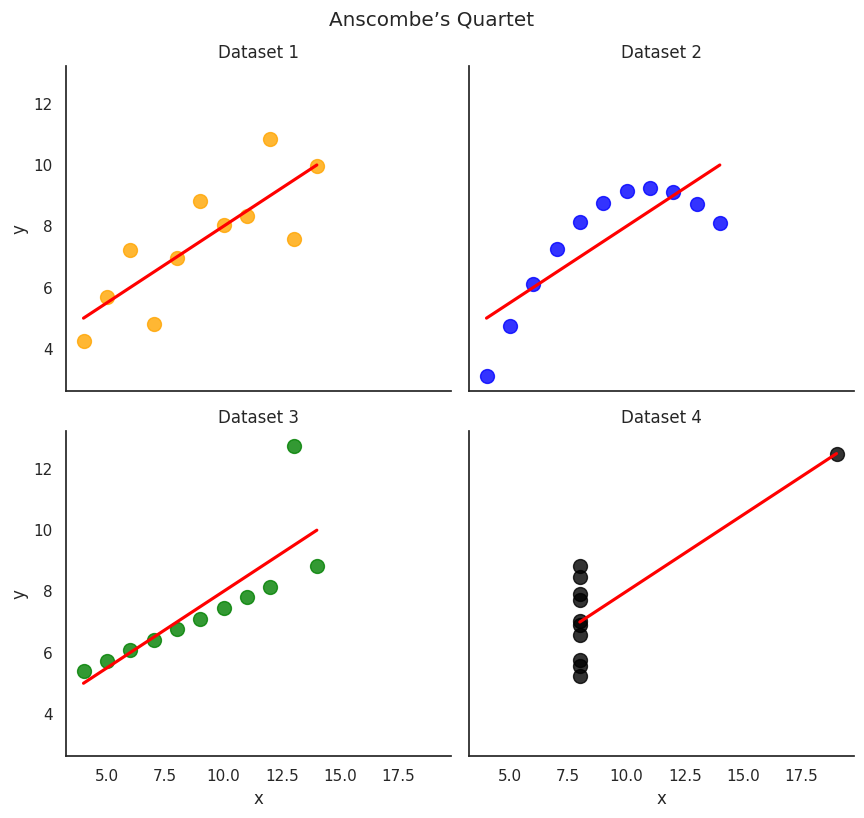

In [8]:
g = sns.lmplot(
    data=anscombe_melted,
    x="x",
    y="y",
    col="dataset",
    col_wrap=2,
    ci=None,
    height=4,
    aspect=1.1,
    scatter_kws={"s":100}
)

titles = ["Dataset 1", "Dataset 2", "Dataset 3", "Dataset 4"]
colours = ["orange", "blue", "green", "black"]

for ax, title, colour in zip(g.axes, titles, colours):
    ax.set_title(title)

    for collection in ax.collections:
        collection.set_facecolor(colour)
        collection.set_edgecolor(colour)

    ax.lines[0].set_color("red")

plt.suptitle("Anscombe’s Quartet", y=1.02)

In [9]:
def dataset_stats(df, name):
    x = df["x"]
    y = df["y"]
    
    mean_x = np.mean(x)
    mean_y = np.mean(y)
    var_x = np.var(x, ddof=1)
    var_y = np.var(y, ddof=1)
    corr = np.corrcoef(x, y)[0, 1]
    
    slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
    r_squared = r_value**2
    
    return {
        "Dataset": name,
        "Mean x": round(mean_x, 2),
        "Mean y": round(mean_y, 2),
        "Var x": round(var_x, 2),
        "Var y": round(var_y, 2),
        "Correlation": round(corr, 3),
        "Slope": round(slope, 3),
        "Intercept": round(intercept, 3),
        "R²": round(r_squared, 3)
    }

results = []
for dataset_name, group in anscombe_melted.groupby("dataset"):
    results.append(dataset_stats(group, dataset_name))

stats_df = pd.DataFrame(results)
print(stats_df)

  Dataset  Mean x  Mean y  Var x  Var y  Correlation  Slope  Intercept     R²
0      y1     9.0     7.5   11.0   4.13        0.816    0.5      3.000  0.667
1      y2     9.0     7.5   11.0   4.13        0.816    0.5      3.001  0.666
2      y3     9.0     7.5   11.0   4.12        0.816    0.5      3.002  0.666
3      y4     9.0     7.5   11.0   4.12        0.817    0.5      3.002  0.667
